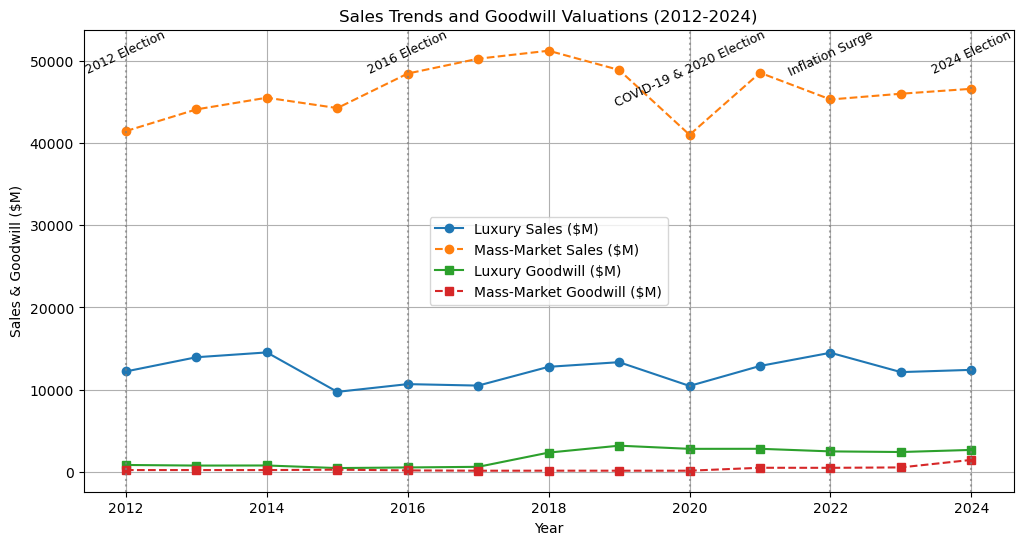

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

file_paths = {
    "goodwill": "/Users/janellemarie/datasets/goodwill_value.csv",
    "yearly_sales": "/Users/janellemarie/datasets/yearly_sales.csv",
    "quarterly_sales": "/Users/janellemarie/datasets/quarterly_sales.csv",
    "h&m_goodwill": "/Users/janellemarie/datasets/hm_goodwill_usd.csv",
    "h&m_quarterly_sales": "/Users/janellemarie/datasets/hm_quarterly_sales_converted.csv",
    "h&m_sales": "/Users/janellemarie/datasets/hm_sales_converted.csv",
}

dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

dataframes["h&m_quarterly_sales"].rename(columns={"Net Sales (USD Millions)": "Net Sales ($ Millions)"}, inplace=True)
dataframes["h&m_goodwill"].rename(columns={"Goodwill Value (USD Millions)": "Goodwill Value ($ Millions)"}, inplace=True)

h_m_quarterly_sales = dataframes["h&m_quarterly_sales"][["Year", "Brand", "Luxury or Mass-Market", "Net Sales ($ Millions)", "Fiscal Quarter"]]
quarterly_sales = dataframes["quarterly_sales"][["Year", "Brand", "Luxury or Mass-Market", "Net Sales ($ Millions)", "Fiscal Quarter"]]
combined_quarterly_sales = pd.concat([quarterly_sales, h_m_quarterly_sales], ignore_index=True)

combined_quarterly_sales["Net Sales ($ Millions)"] = (
    combined_quarterly_sales["Net Sales ($ Millions)"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)

quarterly_sales_grouped = combined_quarterly_sales.groupby(["Year", "Luxury or Mass-Market"])["Net Sales ($ Millions)"].sum().unstack()

h_m_goodwill = dataframes["h&m_goodwill"][["Year", "Brand", "Luxury or Mass-Market", "Goodwill Value ($ Millions)"]]
goodwill = dataframes["goodwill"][["Year", "Brand", "Luxury or Mass-Market", "Goodwill Value ($ Millions)"]]
combined_goodwill = pd.concat([goodwill, h_m_goodwill], ignore_index=True)

combined_goodwill["Goodwill Value ($ Millions)"] = (
    combined_goodwill["Goodwill Value ($ Millions)"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)

goodwill_grouped = combined_goodwill.groupby(["Year", "Luxury or Mass-Market"])["Goodwill Value ($ Millions)"].sum().unstack()

plt.figure(figsize=(12, 6))

plt.plot(quarterly_sales_grouped.index, quarterly_sales_grouped["Luxury"], label="Luxury Sales ($M)", linestyle="-", marker="o")
plt.plot(quarterly_sales_grouped.index, quarterly_sales_grouped["Mass-Market"], label="Mass-Market Sales ($M)", linestyle="--", marker="o")

plt.plot(goodwill_grouped.index, goodwill_grouped["Luxury"], label="Luxury Goodwill ($M)", linestyle="-", marker="s")
plt.plot(goodwill_grouped.index, goodwill_grouped["Mass-Market"], label="Mass-Market Goodwill ($M)", linestyle="--", marker="s")

events = {
    2012: "2012 Election",
    2016: "2016 Election",
    2020: "COVID-19 & 2020 Election",
    2022: "Inflation Surge",
    2024: "2024 Election"
}
for year, label in events.items():
    plt.axvline(x=year, color="gray", linestyle=":", alpha=0.7)
    plt.text(year, 54000, label, rotation=25, ha="center", va="top", fontsize=9)

plt.xlabel("Year")
plt.ylabel("Sales & Goodwill ($M)")
plt.title("Sales Trends and Goodwill Valuations (2012-2024)")
plt.legend()
plt.grid(True)

plt.show()


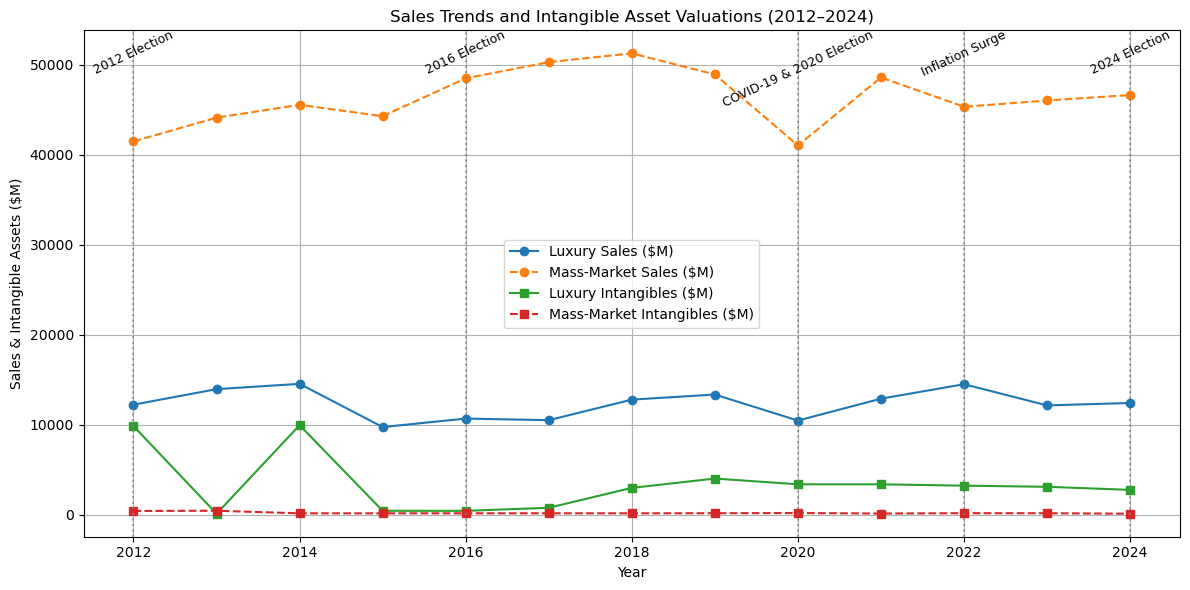

In [31]:
goodwill = pd.read_csv("/Users/janellemarie/datasets/goodwill_value.csv")
hm_goodwill = pd.read_csv("/Users/janellemarie/datasets/hm_goodwill_usd.csv")

combined_intangibles = pd.concat([goodwill, hm_goodwill], ignore_index=True)

combined_intangibles["Intangible Assets ($ Millions)"] = (
    combined_intangibles["Intangible Assets ($ Millions)"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)

intangibles_grouped = combined_intangibles.groupby(["Year", "Luxury or Mass-Market"])["Intangible Assets ($ Millions)"].sum().unstack()
intangibles_grouped.head()

plt.figure(figsize=(12, 6))

plt.plot(quarterly_sales_grouped.index, quarterly_sales_grouped["Luxury"], label="Luxury Sales ($M)", linestyle="-", marker="o")
plt.plot(quarterly_sales_grouped.index, quarterly_sales_grouped["Mass-Market"], label="Mass-Market Sales ($M)", linestyle="--", marker="o")

plt.plot(intangibles_grouped.index, intangibles_grouped["Luxury"], label="Luxury Intangibles ($M)", linestyle="-", marker="s")
plt.plot(intangibles_grouped.index, intangibles_grouped["Mass-Market"], label="Mass-Market Intangibles ($M)", linestyle="--", marker="s")

events = {
    2012: "2012 Election",
    2016: "2016 Election",
    2020: "COVID-19 & 2020 Election",
    2022: "Inflation Surge",
    2024: "2024 Election"
}

for year, label in events.items():
    plt.axvline(x=year, color="gray", linestyle=":", alpha=0.7)
    plt.text(year, 54000, label, rotation=25, ha="center", va="top", fontsize=9)

plt.xlabel("Year")
plt.ylabel("Sales & Intangible Assets ($M)")
plt.title("Sales Trends and Intangible Asset Valuations (2012–2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


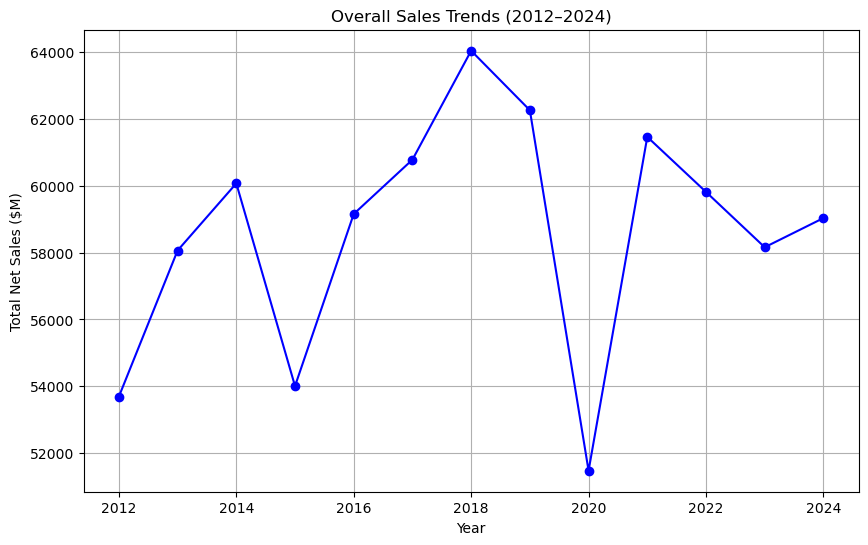

In [44]:
quarterly_sales = dataframes["quarterly_sales"]
h_m_quarterly_sales = dataframes["h&m_quarterly_sales"]

h_m_quarterly_sales = h_m_quarterly_sales.rename(columns={"Net Sales (USD Millions)": "Net Sales ($ Millions)"})
combined_sales = pd.concat([quarterly_sales, h_m_quarterly_sales], ignore_index=True)

combined_sales["Net Sales ($ Millions)"] = (
    combined_sales["Net Sales ($ Millions)"]
    .astype(str)
    .str.replace(",", "")
    .astype(float)
)

sales_trends = combined_sales.groupby("Year")["Net Sales ($ Millions)"].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sales_trends["Year"], sales_trends["Net Sales ($ Millions)"], marker="o", linestyle="-", color="blue")

plt.xlabel("Year")
plt.ylabel("Total Net Sales ($M)")
plt.title("Overall Sales Trends (2012–2024)")
plt.grid(True)
plt.show()


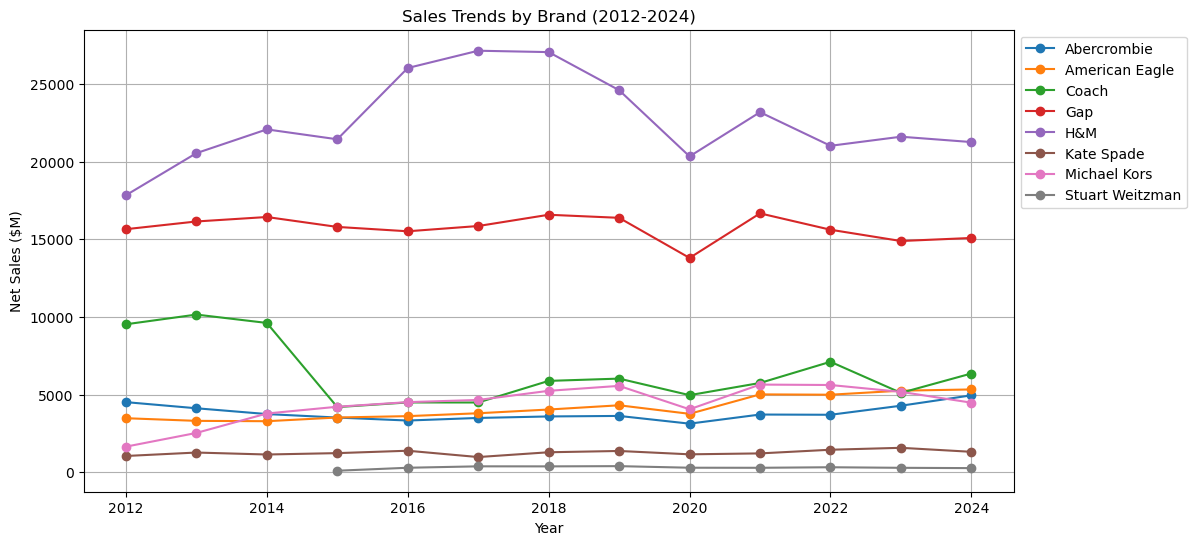

In [49]:
combined_sales["Brand"] = combined_sales["Brand"].str.strip()

combined_sales["Brand"] = combined_sales["Brand"].replace("Gap Inc.", "Gap")

sales_trends_by_brand = combined_sales.groupby(["Year", "Brand"])["Net Sales ($ Millions)"].sum().unstack()

combined_sales.groupby(["Year", "Brand"])["Net Sales ($ Millions)"].sum().unstack()

plt.figure(figsize=(12, 6))

for brand in sales_trends_by_brand.columns:
    plt.plot(sales_trends_by_brand.index, sales_trends_by_brand[brand], marker="o", linestyle="-", label=brand)

plt.xlabel("Year")
plt.ylabel("Net Sales ($M)")
plt.title("Sales Trends by Brand (2012-2024)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True)

# Show the plot
plt.show()

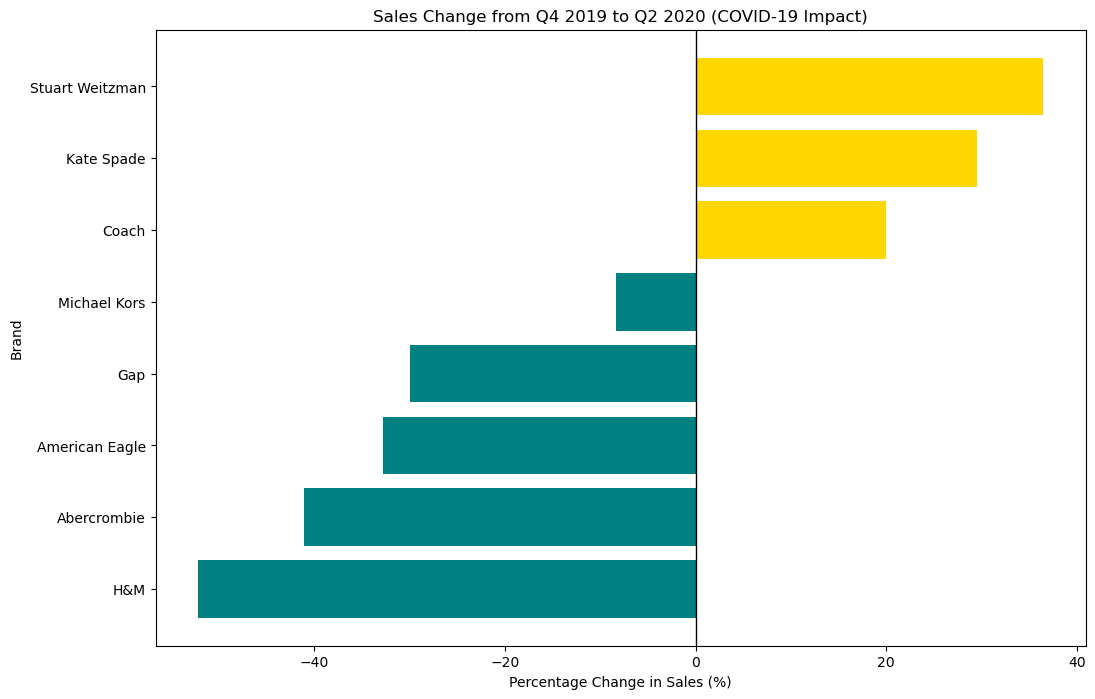

In [52]:
sales_2019_q4 = combined_sales[(combined_sales["Year"] == 2019) & (combined_sales["Fiscal Quarter"] == "Q4")].groupby("Brand")["Net Sales ($ Millions)"].sum()
sales_2020_q2 = combined_sales[(combined_sales["Year"] == 2020) & (combined_sales["Fiscal Quarter"] == "Q2")].groupby("Brand")["Net Sales ($ Millions)"].sum()

sales_change_2020 = pd.DataFrame({"Q4 2019 Sales": sales_2019_q4, "Q2 2020 Sales": sales_2020_q2})
sales_change_2020.fillna(0, inplace=True)
sales_change_2020["Percentage Change"] = ((sales_change_2020["Q2 2020 Sales"] - sales_change_2020["Q4 2019 Sales"]) / 
                                          sales_change_2020["Q4 2019 Sales"].replace(0, 1)) * 100
sales_change_2020_sorted = sales_change_2020.sort_values(by="Percentage Change")

colors_by_change = sales_change_2020_sorted["Percentage Change"].apply(lambda x: "teal" if x < 0 else "gold")

plt.figure(figsize=(12, 8))
plt.barh(sales_change_2020_sorted.index, sales_change_2020_sorted["Percentage Change"], color=colors_by_change)
plt.xlabel("Percentage Change in Sales (%)")
plt.ylabel("Brand")
plt.title("Sales Change from Q4 2019 to Q2 2020 (COVID-19 Impact)")
plt.axvline(x=0, color="black", linewidth=1)
plt.show()

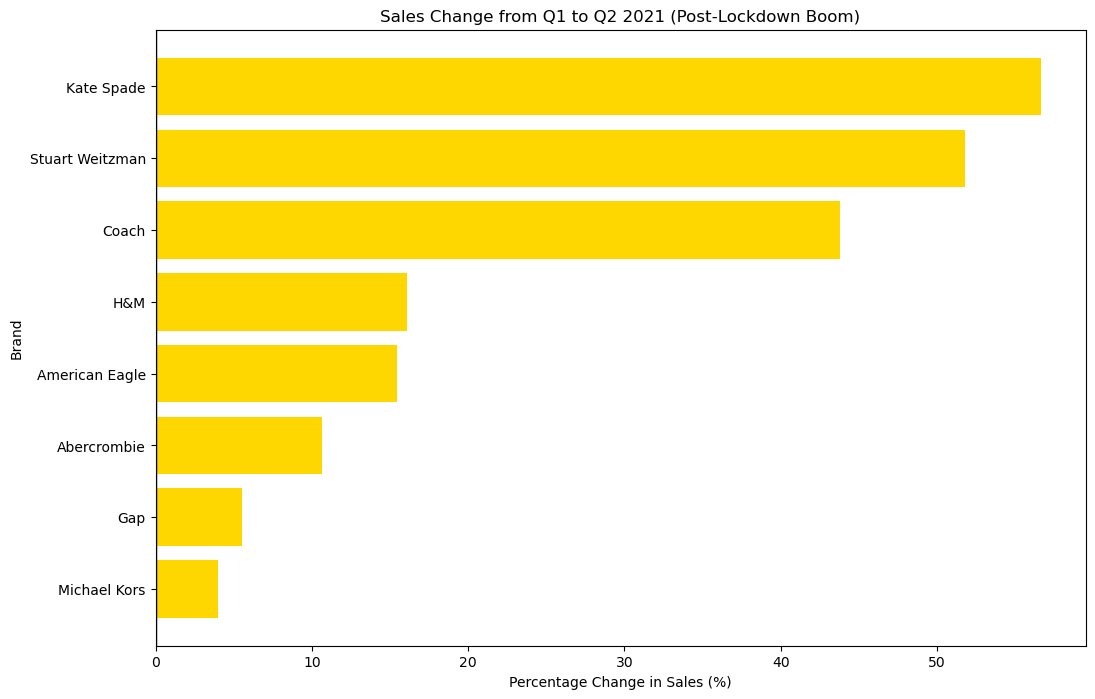

In [54]:
sales_2021_q1 = combined_sales[(combined_sales["Year"] == 2021) & (combined_sales["Fiscal Quarter"] == "Q1")].groupby("Brand")["Net Sales ($ Millions)"].sum()
sales_2021_q2 = combined_sales[(combined_sales["Year"] == 2021) & (combined_sales["Fiscal Quarter"] == "Q2")].groupby("Brand")["Net Sales ($ Millions)"].sum()

sales_change_2021 = pd.DataFrame({"Q1 2021 Sales": sales_2021_q1, "Q2 2021 Sales": sales_2021_q2})
sales_change_2021.fillna(0, inplace=True)
sales_change_2021["Percentage Change"] = ((sales_change_2021["Q2 2021 Sales"] - sales_change_2021["Q1 2021 Sales"]) /
                                          sales_change_2021["Q1 2021 Sales"].replace(0, 1)) * 100
sales_change_2021_sorted = sales_change_2021.sort_values(by="Percentage Change")

colors_2021 = sales_change_2021_sorted["Percentage Change"].apply(lambda x: "blue" if x < 0 else "gold")

plt.figure(figsize=(12, 8))
plt.barh(sales_change_2021_sorted.index, sales_change_2021_sorted["Percentage Change"], color=colors_2021)
plt.xlabel("Percentage Change in Sales (%)")
plt.ylabel("Brand")
plt.title("Sales Change from Q1 to Q2 2021 (Post-Lockdown Boom)")
plt.axvline(x=0, color="black", linewidth=1)
plt.show()